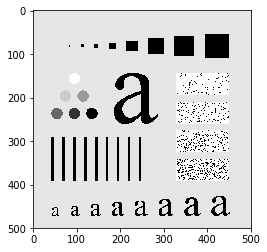

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("smooth.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h,w = img.shape[0],img.shape[1]



plt.imshow(img, cmap = 'gray')


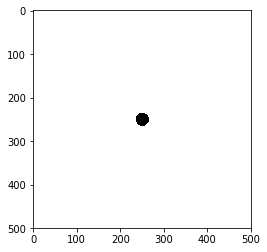

In [37]:
filter1 = np.zeros((h,w), dtype = np.uint8)
filter1 = cv2.circle(filter1, (h//2,w//2), 15, 255, -1)
filter1 = 255 - filter1
plt.imshow(filter1, cmap = 'gray')

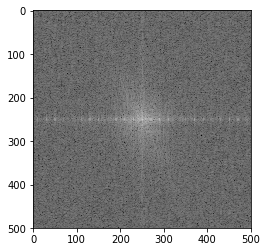

In [38]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum1 = 20*np.log(1+np.abs(img_fft))

plt.imshow((magnitude_spectrum1), cmap = "gray")

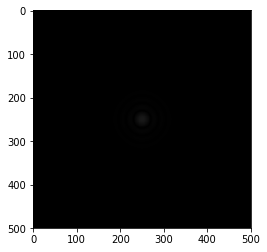

In [39]:
filter1_fft = np.fft.ifftshift(np.fft.ifft2(filter1))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum1 = 20*np.log(1+np.abs(filter1_fft))

plt.imshow((magnitude_spectrum1), cmap = "gray")

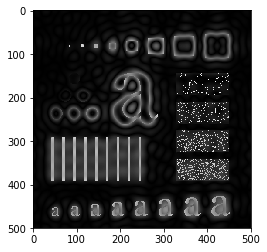

In [40]:
ans = np.multiply(img_fft, filter1)
ans = np.fft.ifft2(np.fft.ifftshift(ans))
ans = np.abs(ans)
plt.imshow(ans, cmap = 'gray')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


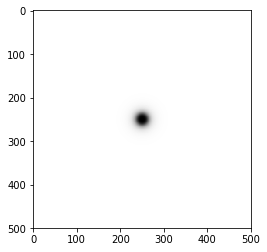

In [53]:
D0 = 15
n=2
# h,w = 5,5
butterworth = np.ones((h,w))
for i in range(h):
    for j in range(w):
        butterworth[i][j] = np.sqrt((i-(h//2))**2+(j-(w//2))**2)
# plt.imshow(butterworth, cmap = "gray")
# print(butterworth)
for i in range(h):
    for j in range(w):
        butterworth[i][j] = 1/(1+(D0/butterworth[i][j])**(2*n))
        

plt.imshow(butterworth, cmap = "gray")

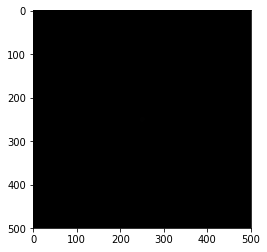

In [54]:
# plt.imshow(butterworth, cmap = "gray")
img1_fft = np.fft.ifftshift(np.fft.ifft2(butterworth))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum2 = 20*np.log(1+np.abs(img1_fft))

plt.imshow((magnitude_spectrum2), cmap = "gray")

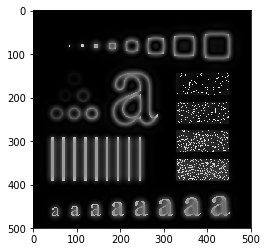

In [55]:
img_filter = np.multiply(img_fft, butterworth)
ans = np.fft.ifft2(np.fft.ifftshift(img_filter))
ans = np.abs(ans)
plt.imshow(ans, cmap = 'gray')


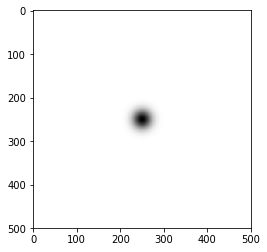

In [57]:
D0 = 15

gaussian = np.ones((h,w))
for i in range(h):
    for j in range(w):
        gaussian[i][j] = np.sqrt((i-(h//2))**2+(j-(w//2))**2)
        
for i in range(h):
    for j in range(w):
        gaussian[i][j] = 1-np.exp(-(gaussian[i][j])**2/(2*(D0**2)))

plt.imshow(gaussian, cmap = "gray")

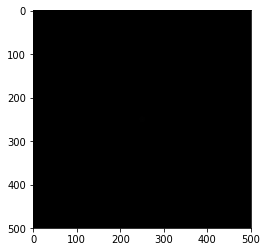

In [58]:
# plt.imshow(butterworth, cmap = "gray")
img1_fft = np.fft.ifftshift(np.fft.ifft2(gaussian))
# filter_fft = np.fft.fftshift(np.fft.fft2(filter1))

magnitude_spectrum2 = 20*np.log(1+np.abs(img1_fft))

plt.imshow((magnitude_spectrum2), cmap = "gray")

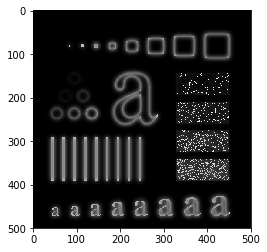

In [59]:
img_filter = np.multiply(img_fft, gaussian)
ans = np.fft.ifft2(np.fft.ifftshift(img_filter))
ans = np.abs(ans)
plt.imshow(ans, cmap = 'gray')